# WSA Scikit-Learn Regression Demo

## Imports & Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [3]:
df = pd.read_csv('Michigan_GameLogs_F24.csv').drop(columns=['id'])
df.rename(columns = {
    'home_away' : 'location',
    'points_scored' : 'pts_scored',
    'points_against' : 'pts_against',
    'pass_td' : 'pass_tds',
    'pass_1st_down' : 'pass_first_downs',
    'rush_td' : 'rush_tds',
    'rush_1st_down' : 'rush_first_downs'
}, inplace = True)
df.tail()

,date,year,opponent,location,result,pts_scored,pts_against,pass_cmp,pass_att,pass_pct,pass_yrds,pass_tds,pass_first_downs,rush_att,rush_yrds,rush_tds,rush_first_downs,total_offense,fumbles,ints
169,2024-09-28,2024,Minnesota,Home,W,27,24,10,18,55.6,86,1,5,43,155,2,9,241,0,1
170,2024-10-05,2024,Washington,Away,L,17,27,13,25,52.0,113,1,7,37,174,1,9,287,1,1
171,2024-10-19,2024,Illinois,Away,L,7,21,20,32,62.5,208,0,8,38,114,1,10,322,2,1
172,2024-10-26,2024,Michigan State,Home,W,24,17,14,20,70.0,146,2,9,31,119,1,7,265,0,0
173,2024-11-02,2024,Oregon,Home,L,17,38,13,25,52.0,165,2,7,28,105,0,4,270,0,0


In [5]:
# Linear regression analyzes the relationship betwen two variables (x and y). 
# This binary df extracts only the columns we will use for our regression models
df_binary = df[['total_offense', 'pts_scored']]
df_binary

,total_offense,pts_scored
0,288,34
1,452,35
2,471,31
3,413,28
4,580,58
...,...,...
169,241,27
170,287,17
171,322,7
172,265,24


In [7]:
# Check for null values
df_binary.isnull().sum()

total_offense    0
pts_scored       0
dtype: int64

In [9]:
# Remove duplicate rows if they exist
df_binary = df_binary.dropna()
df_binary

,total_offense,pts_scored
0,288,34
1,452,35
2,471,31
3,413,28
4,580,58
...,...,...
169,241,27
170,287,17
171,322,7
172,265,24


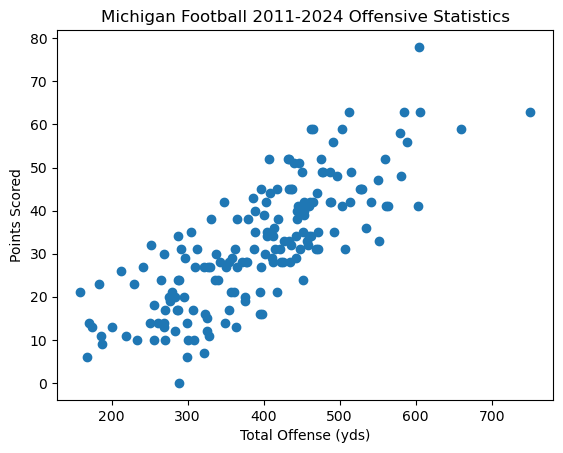

In [11]:
plt.scatter(df_binary['total_offense'], df_binary['pts_scored'])
plt.xlabel('Total Offense (yds)')
plt.ylabel('Points Scored')
plt.title('Michigan Football 2011-2024 Offensive Statistics')
plt.show()

## Linear and Polynomial Regression with Scikit-Learn

### Separate Data into Training and Testing Data

In [13]:
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# .reshape(-1, 1) shapes the array so there is only one column

X = np.array(df_binary['total_offense']).reshape(-1,1)
y = np.array(df_binary['pts_scored']).reshape(-1,1)

print('X:', X[:5])
print('y:', y[:5])

X: [[288]
 [452]
 [471]
 [413]
 [580]]
y: [[34]
 [35]
 [31]
 [28]
 [58]]


The `train_test_split` [function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) splits your data randomly (unbiased) into training and testing sets.
Our model needs data to "learn" (training data) and data to compare its predictions with (testing)
to see how well it has actually learned; using the same data for both model selection and for inference can lead to biased estimates and overfitting.

This example uses a test size of $20\%$, following the **80/20** train/test split rule. The majority of our data should be be used for training; a **70/30** split is also common.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Running Linear Regression and Plotting Result

* `LinearRegression()` creates a model object
    * Imported from `sklearn.linear_model`
* We fit the model to our training data with `.fit()`
* `.score()` evaluates our model on the testing split using the coefficient of determination, $R^2.$
    * The $R^2$ statistic explains that 0.XXX of the variation in y is explained by X
    * For example, if $R^2$ is 0.90, then 90% of the variation in points scored is explained by the combination of explanatory variables that we have chosen.

In [17]:
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.668905867479523

In [19]:
# Model parameters
a = regr.intercept_.item()
b = regr.coef_[0].item()
print(f'y^ = {a:.4f} + {b:.4f}x')

y^ = -9.3929 + 0.1049x


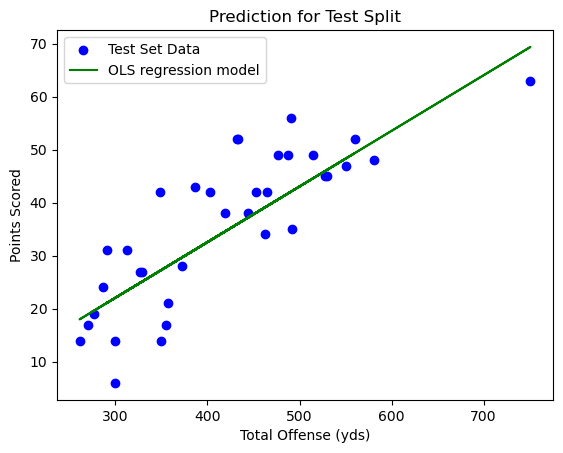

In [21]:
# Let's plot our predicted values in a scatter plot
y_pred = regr.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color = 'b', label='Test Set Data')
plt.plot(X_test, y_pred, color = 'g', label='OLS regression model')
plt.xlabel('Total Offense (yds)')
plt.ylabel('Points Scored')
plt.title('Prediction for Test Split')
plt.legend()
plt.show()

### Running Polynomial Regression and Plotting Result

In [25]:
# We will now have to change our X training data to fit a quadratic regression
poly_reg = PolynomialFeatures(degree=2)

# Next, we use the .fit_transform() function to scale the data and its parameters
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [27]:
# Now we create our polynomial regression model, similar to before

poly_regr = LinearRegression()
poly_regr.fit(X_train_poly, y_train)
poly_regr.score(X_test_poly, y_test)

0.605576967362408

In [29]:
# Model parameters
coef = poly_regr.coef_[0]
a = poly_regr.intercept_.item()
b = coef[1].item()
c = coef[2].item()
print(f'y^ = {a:.4f} + {b:.4f}x + {c:.4f}x^2')

y^ = 4.4920 + 0.0270x + 0.0001x^2


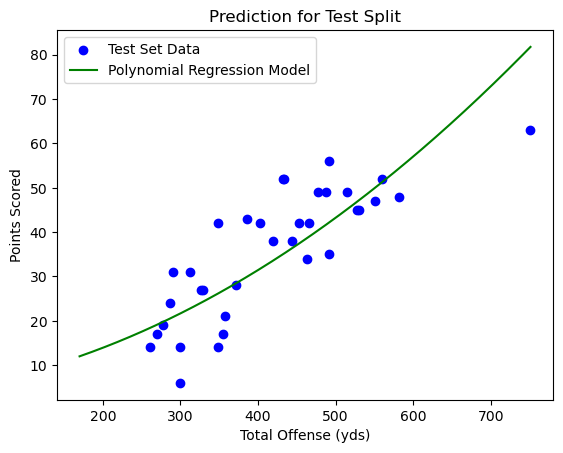

In [31]:
y_pred_poly = poly_regr.predict(X_test_poly)

xs = np.linspace(170, np.max(X), 500)
ys = a + b*xs + c*xs**2

plt.figure()
plt.scatter(X_test, y_test, color = 'b', label='Test Set Data')
plt.plot(xs, ys, color = 'g', label='Polynomial Regression Model')
plt.xlabel('Total Offense (yds)')
plt.ylabel('Points Scored')
plt.title('Prediction for Test Split')
plt.legend()
plt.show()

**Polynomial Model Takeaways**
* Our polynomial regression model is nearly as accurate as the linear model based on $R^2$
* This may be different if there were more data
    * Additional Michigan football seasons
    * Additional FBS teams besides Michigan

### Computing Errors and Comparing Models

**Mean Absolute Error** (MAE)
* Measures the average magnitude of the errors in a set of predictions, without considering their direction

**Mean Squared Error** (MSE)
* Measures the average squared error between the predicted and actual values
* Greater penalization for larger residuals compared to MAE

**Root Mean Squared Error** (RMSE)
* Measures the square root of MSE
* Measured in same units as response variable

In [33]:
# Linear Regression Model Error

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 6.55102885801413
MSE: 66.63127519489237
RMSE: 8.162798245386956


In [35]:
# Polynomial Regression Model Error

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = root_mean_squared_error(y_test, y_pred_poly)

print("MAE:", mae_poly)
print("MSE:", mse_poly)
print("RMSE:", rmse_poly)

MAE: 7.188875264190111
MSE: 79.37594493388981
RMSE: 8.909317871413602


The errors are very similar for both models, meaning that we didn't gain much by adding a quadratic term to our original model. In this case, the simpler model is preferred to avoid overfitting!

We can also combat overfitting by increasing the training dataset size, early stopping during the training phase, and [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) regularization or [LASSO](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) regularization. [Cross-validation](https://scikit-learn.org/1.5/modules/cross_validation.html) (to be covered in the future) is strongly recommended for larger datasets.

## Bonus: Multiple Least-Squares Regression Example

In [37]:
# Make sure statsmodels is installed
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse as rms_error

In [39]:
# Making inferences with existing data - what variables are significant?
# X are our explanatory variables
# y is our response variable

X = sm.add_constant(df[['pass_pct', 'pass_yrds', 'pass_tds', 'rush_att', 'rush_yrds', 'rush_tds', 'total_offense']])
y = df['pts_scored']

In [41]:
# Use sm.OLS() (Ordinary Least Squares) to estimate coefficients
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pts_scored   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     208.0
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           8.94e-75
Time:                        15:27:16   Log-Likelihood:                -524.39
No. Observations:                 174   AIC:                             1063.
Df Residuals:                     167   BIC:                             1085.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.7179      2.961     -1.256      0.211      -9.563       2.127
pass_pct          0.0848      0.041      2.092      0.038       0.005       0.165
pass_yrds         0.0030      0.004      0.748      0.455      -0.005       0.011
pass_tds          5.5439      0.404     13.724      0.000       4.746       6.341
rush_att          0.1066      0.061      1.746      0.083      -0.014       0.227
rush_yrds         0.0077      0.005      1.680      0.095      -0.001       0.017
rush_tds          5.3113      0.347     15.315      0.000       4.627       5.996
total_offense     0.0107      0.004      2.591      0.010       0.003       0.019
==============================================================================
Omnibus:                       13.182   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.399
Skew:                           0.703   Prob(JB):                     0.000747
Kurtosis:                       3.082   Cond. No.                     4.40e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

***********
**Additional Note**
* The coef column shows the coefficients for each of our explanatory variables as well as our y-intercept (const)

In [43]:
# .predict() will create a prediction for points scored for each of our rows in our df
predicted = model.predict(X)
predicted

0      25.708262
1      37.166657
2      34.863046
3      33.499850
4      49.747059
         ...    
169    25.789260
170    20.253793
171    15.903731
172    26.123236
173    18.967407
Length: 174, dtype: float64

In [45]:
# RMSE is our preferred error statistic
rms_error(y, predicted)

4.927276264040777

In [47]:
# We can add the predictions to our dataframe
# Residuals are (observed) - (predicted)

df['predicted_pts_scored'] = predicted
df['pts_scored_diff'] = df['pts_scored'] - df['predicted_pts_scored']
df_subset = df[['date', 'year', 'opponent', 'result', 'pts_scored', 'predicted_pts_scored', 'pts_scored_diff']]
df_subset.tail(9)

,date,year,opponent,result,pts_scored,predicted_pts_scored,pts_scored_diff
165,2024-08-31,2024,Fresno State,W,30,20.416041,9.583959
166,2024-09-07,2024,Texas,L,12,14.211395,-2.211395
167,2024-09-14,2024,Arkansas State,W,28,35.967321,-7.967321
168,2024-09-21,2024,Southern California,W,27,27.855126,-0.855126
169,2024-09-28,2024,Minnesota,W,27,25.789260,1.210740
170,2024-10-05,2024,Washington,L,17,20.253793,-3.253793
171,2024-10-19,2024,Illinois,L,7,15.903731,-8.903731
172,2024-10-26,2024,Michigan State,W,24,26.123236,-2.123236
173,2024-11-02,2024,Oregon,L,17,18.967407,-1.967407


### Feature Selection

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pts_scored   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     208.0
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           8.94e-75
Time:                        15:29:15   Log-Likelihood:                -524.39
No. Observations:                 174   AIC:                             1063.
Df Residuals:                     167   BIC:                             1085.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.7179      2.961     -1.256      0.211      -9.563       2.127
pass_pct          0.0848      0.041      2.092      0.038       0.005       0.165
pass_yrds         0.0030      0.004      0.748      0.455      -0.005       0.011
pass_tds          5.5439      0.404     13.724      0.000       4.746       6.341
rush_att          0.1066      0.061      1.746      0.083      -0.014       0.227
rush_yrds         0.0077      0.005      1.680      0.095      -0.001       0.017
rush_tds          5.3113      0.347     15.315      0.000       4.627       5.996
total_offense     0.0107      0.004      2.591      0.010       0.003       0.019
==============================================================================
Omnibus:                       13.182   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.399
Skew:                           0.703   Prob(JB):                     0.000747
Kurtosis:                       3.082   Cond. No.                     4.40e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

******************

If we reexamine the model summary, we observe evidence of multicollinearity. The coefficients for several explanatory variables are extremely close to zero, or are not statistically significant at the 95% confidence level, indicating that we can construct a simpler model that provides a simpler fit, and does not have any issues with multicollinearity. Try experimenting with the set of explanatory variables we used to fit our multivariate model, removing features that seem unnecessary to see if we can find an improved fit, making sure to change the model by one predictor at a time, and fit a model for each unique subset of predictors.

In [51]:
X = sm.add_constant(df[['pass_pct', 'pass_tds', 'rush_att', 'rush_tds']])
y = df['pts_scored']

model = sm.OLS(y, X).fit()
model.summary()

# Coefficients for pass_tds and rush_tds close to precise number of points scored for each TD (not including extra point)
# Does this indicate that passing touchdowns are worth more than rushing touchdowns?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pts_scored   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     301.9
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           8.01e-76
Time:                        15:30:42   Log-Likelihood:                -527.84
No. Observations:                 174   AIC:                             1066.
Df Residuals:                     169   BIC:                             1081.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7517      2.864     -0.961      0.338      -8.406       2.902
pass_pct       0.0983      0.040      2.457      0.015       0.019       0.177
pass_tds       6.1236      0.326     18.794      0.000       5.480       6.767
rush_att       0.1675      0.051      3.275      0.001       0.067       0.268
rush_tds       5.8473      0.276     21.202      0.000       5.303       6.392
==============================================================================
Omnibus:                       13.874   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.287
Skew:                           0.725   Prob(JB):                     0.000479
Kurtosis:                       3.092   Cond. No.                         542.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""